D-LIM
[0.7222500640875272, 0.9103611402721982, 0.9489337637890668, 0.9674119738562116, 0.9259675633586324, 0.982554537613299, 0.9685872987430423]
LR
[0.8290586137435124, 0.9289576689251055, 0.958137773488778, 0.9655161156094405, 0.9678780405276642, 0.9694534104045169, 0.9665513790780952]
ALM
[0.6707054965629984, 0.8744827548886211, 0.9020148584415824, 0.9327874684855009, 0.9696047321885872, 0.978348875077853, 0.9831743268280261]
LANTERN
[0.848750089379195, 0.9470919167253842, 0.975638699782299, 0.9807362298843976, 0.9852574804548621, 0.9885852809664234, 0.9894267398588945]
MAVE-NN
[0.6786999723032123, 0.811513843694362, 0.900959646637551, 0.9424998925688154, 0.9587332944500077, 0.962025971897011, 0.9693249179138904]
D-LIM
[0.696652292545761, 0.7851159123152285, 0.9156250721548755, 0.9561642247015135, 0.9620517304050372, 0.9586304497435179, 0.9681333091740477]
LR
[0.660800918786259, 0.8465560766482917, 0.8984555871760777, 0.8999904917428606, 0.9163786407994416, 0.9185924554113399, 0.913

/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

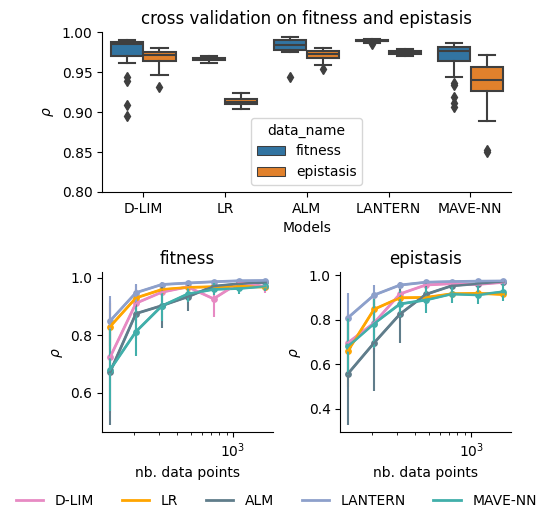

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
sys.path.append('../')
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from numpy import mean, logspace, std
from numpy.random import choice, seed
import matplotlib.pyplot as plt
from multiprocessing import Pool
from dlim.utils import Data_model
# get result 
import joblib
import numpy as np 
import pandas as pd 
fig, ax = plt.subplot_mosaic([['bottom', 'bottom'],['left', 'right']],
                              constrained_layout=True, figsize = (5,5))
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)


data = Data_model(data=df_data, n_variables=2)
color1 = '#e78ac3'  # pink
color2 = '#ffa500'  # modern orange
color3 = '#607d8b'  # light gray-blue
color4 = '#8da0cb' # 
colors = [color1, color2, color3, color4]
colors += ['#41afaa', 'k']
all_result = {}
data_dict = {
    'model': [],
    'acc': [],
    'data_name': []
    }
for id_data, data_name in enumerate(['fitness', 'epistasis']):
    if data_name == 'fitness':
        plot_f = 'left'
        
    else:
        plot_f = 'right'
    val_frac = logspace(-1, 0.1, num=7)

    for id, model in enumerate(['dlim', 'LR', 'ALM', 'LANTERN', 'MAVE-NN']):
        if (model == 'MAVE-NN'):
            result_nn_reg = joblib.load('results_v2/' + str(data_name) + '/reg_' + str(model) + '_2.joblib')
        elif (model == 'dlim'):
            # result_nn_reg = joblib.load('results_v2/' + str(data_name) + '/reg_' + str(model) + '_v2.joblib')
            result_nn_reg = joblib.load('results/harry_' + str(data_name) + '/reg_' + str(model) + '.joblib')

        else:
            result_nn_reg = joblib.load('results_v2/' + str(data_name) + '/reg_' + str(model) + '.joblib')
        
        fracs = list(result_nn_reg.keys())
        res_c = [result_nn_reg[frac] for frac in fracs] 
        res_w = result_nn_reg[fracs[-1]]
        data_dict['acc'] += [float(el) for el in res_c[-1] ]
        if model == 'dlim':
            model = 'D-LIM'
        data_dict['model'] += [str(model) for el in res_w]
        data_dict['data_name'] += [str(data_name) for el in res_w]
        if plot_f == 'right':
            ax[plot_f].plot(val_frac* data.data.shape[0], [mean(el) for el in res_c], c=colors[id], lw=2, label=model)
            ax[plot_f].scatter(val_frac* data.data.shape[0], [mean(el) for el in res_c], c=colors[id], s=15)
            ax[plot_f].errorbar(val_frac* data.data.shape[0], [mean(el) for el in res_c], yerr=[np.quantile(el, 0.95) - mean(el) for el in res_c], c=colors[id])
        else:
            ax[plot_f].plot(val_frac* data.data.shape[0], [mean(el) for el in res_c], c=colors[id], lw=2)
            ax[plot_f].scatter(val_frac* data.data.shape[0], [mean(el) for el in res_c], c=colors[id], s=15)
            ax[plot_f].errorbar(val_frac* data.data.shape[0], [mean(el) for el in res_c], yerr=[np.quantile(el, 0.95) - mean(el) for el in res_c], c=colors[id])
        print(model)
        print([mean(el) for el in res_c])
    ax[plot_f].set_xscale("log")
    for el in ["top", "right"]:
        ax[plot_f].spines[el].set_visible(False)
    ax[plot_f].set_ylabel(f"$\\rho$")
    ax[plot_f].set_xlabel("nb. data points")
    ax[plot_f].set_title(data_name)
    

lgd = fig.legend(frameon=False, ncol = 5, loc='lower center',bbox_to_anchor=(0.5, -0.05, 0, 0),)
df = pd.DataFrame.from_dict(data_dict)
axe = sns.boxplot(data=df, x="model", y="acc", hue="data_name",  palette=["C0", "C1"], ax=ax['bottom'])
axe.set_title('cross validation on fitness and epistasis')
# Remove the top and right spines
axe.spines["top"].set_visible(False)
axe.spines["right"].set_visible(False)
# statistical annotation
axe.set_ylim([0.8, 1.0])
axe.set_xlabel("Models", fontsize = 10)
axe.set_ylabel(f"$\\rho$", fontsize = 10)
fig.tight_layout()
fig.savefig('S5b_model_comp.svg', dpi = 300, transparent = True, bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.show()
